In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv("spotify.csv")
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [43]:
data.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

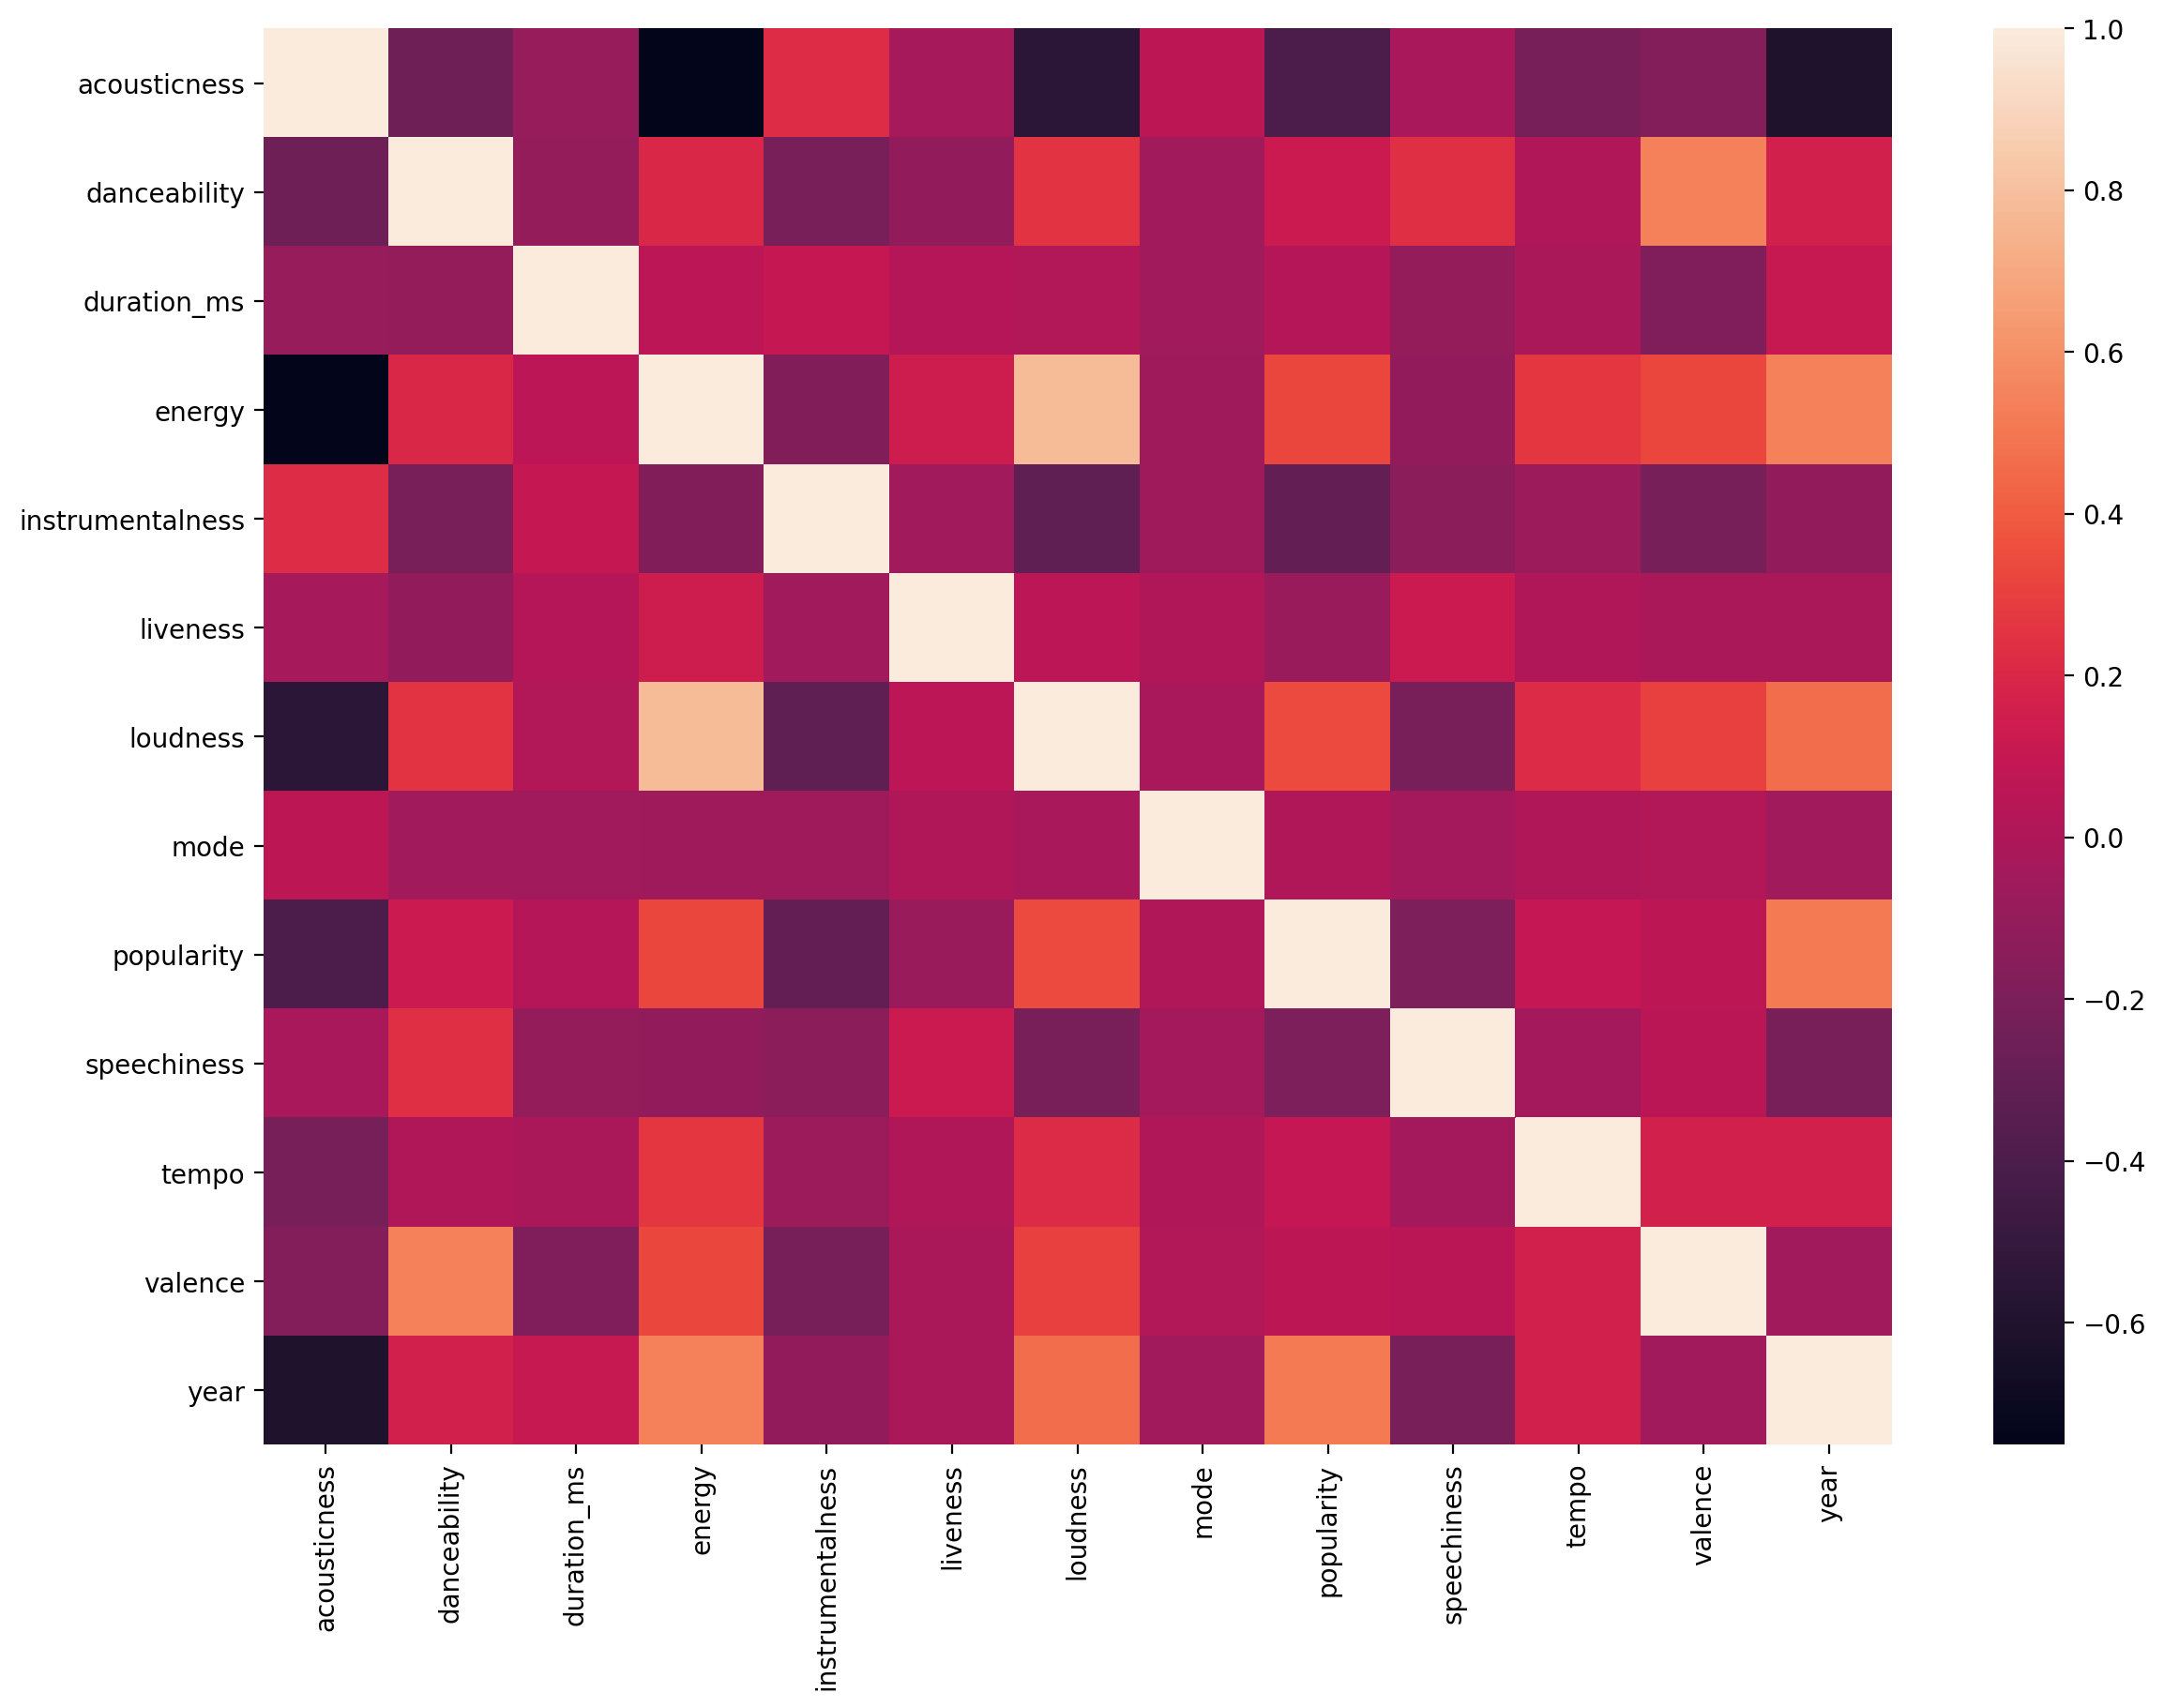

In [45]:
data.drop(['artists', 'explicit', 'id', 'key', 'name', 'release_date'], axis=1, inplace=True)
plt.figure(figsize=(14, 10), dpi=200)
sns.heatmap(data.corr());

In [46]:
by_years=data.groupby('year').acousticness.mean()
by_years

year
1920    0.631242
1921    0.862105
1922    0.828934
1923    0.957247
1924    0.940200
          ...   
2017    0.207413
2018    0.233836
2019    0.261344
2020    0.202303
2021    0.340253
Name: acousticness, Length: 102, dtype: float64

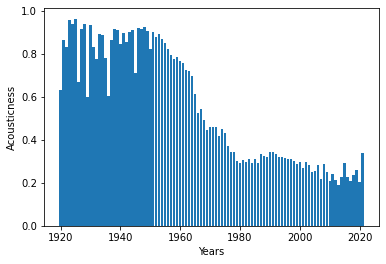

In [47]:
plt.bar(by_years.index, by_years.values)
plt.ylabel("Acousticness")
plt.xlabel("Years")
plt.show()

В матрице бросается в глаза корелляция между старостью трека и его акустичностью. Построили диаграмму с медианными значениями акустичности по годам. И действительно, раньше было лучше (хотя бы в плане акустичности - хотя я хз, что это).

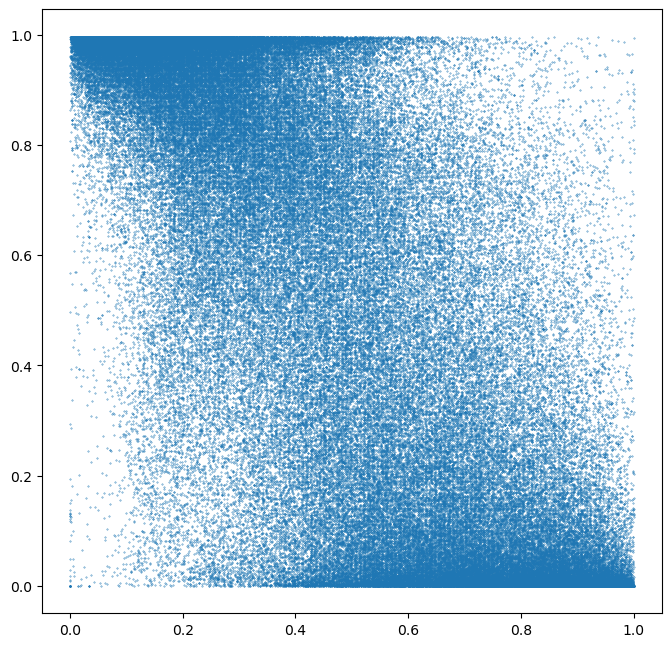

In [48]:
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(data.energy, data.acousticness, s=0.1)
plt.show()

Обращаем внимание у акустичности также на чёрный квадратик на пересечении с энергичностью. Строим точечную диаграмму и легко детектим обратную пропорциональность этих показателей из-за большого скопления точек по углам.

In [49]:
by_years_words=data.groupby('year').speechiness.mean()
by_years_words

year
1920    0.082984
1921    0.078952
1922    0.464368
1923    0.093949
1924    0.092089
          ...   
2017    0.096717
2018    0.121045
2019    0.106820
2020    0.100629
2021    0.108559
Name: speechiness, Length: 102, dtype: float64

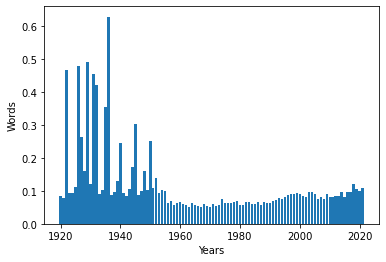

In [50]:
plt.bar(by_years_words.index, by_years_words.values)
plt.ylabel("Words")
plt.xlabel("Years")
plt.show()

В целом можно заметить, что раньше в песнях было больше слов, особенно в какие-то конкретные годы. Сейчас же слов меньше, чем в самом начале и больше, чем во второй половине двадцатого века. На самом деле, хорошо, если сегодня будет выходить меньше музыки со словами. В наше время они зачастую не носят того смысла, что несли раньше(хотя, как мы увидели, лет 40 назад слов было ещё меньше - а это рассвет рока). Минимализм сегодня - лучшее решение, да и лучший протест одновременно. "Не хочешь говорить глупостей - молчи"

In [51]:
loud = 100 + data.loudness
loud/100

0         0.87372
1         0.92739
2         0.87902
3         0.92689
4         0.93964
           ...   
174384    0.94911
174385    0.88335
174386    0.87607
174387    0.87923
174388    0.87763
Name: loudness, Length: 174389, dtype: float64

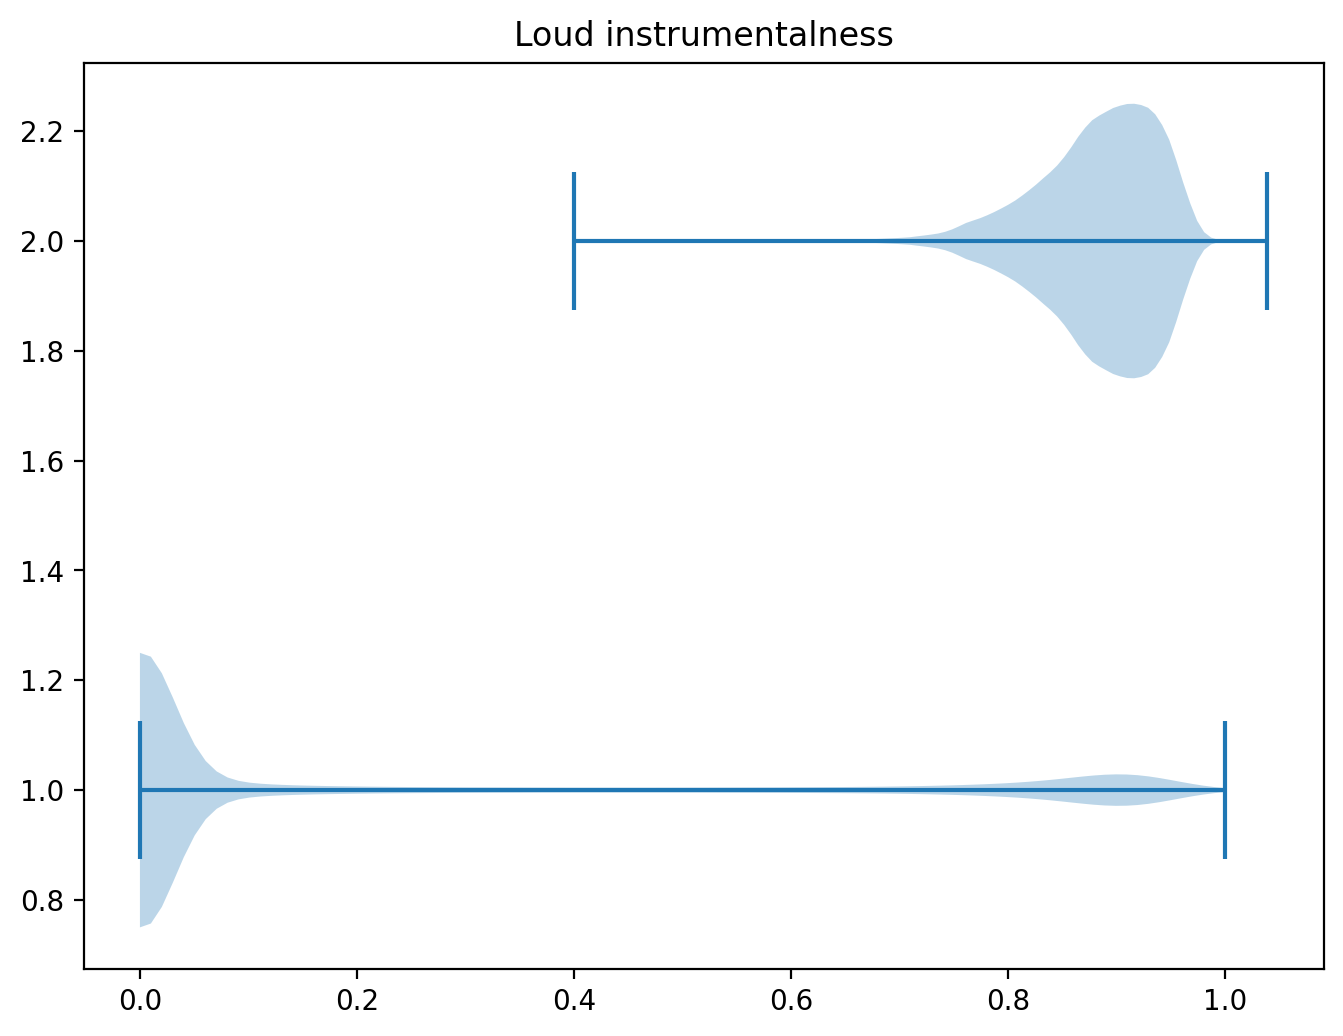

In [52]:
fig, axs = plt.subplots()
fig.set_figheight(6)
fig.set_figwidth(8)
fig.dpi=200
axs.set_title('Loud instrumentalness')
axs.violinplot([data.instrumentalness, loud/100], vert=False)
plt.show()

Инструменталки обычно громче, чем обычное музло. Справедливо.

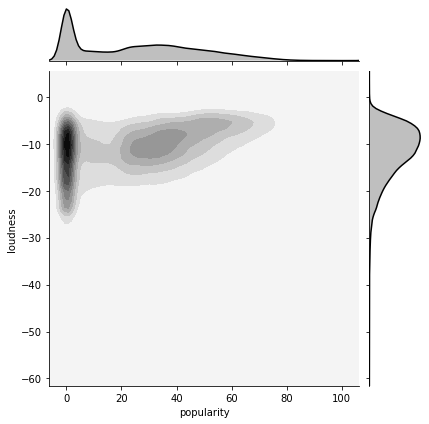

In [53]:
sns.jointplot("popularity", "loudness", data=data, kind="kde", color="black");

In [62]:
by_rating=data.groupby('popularity').loudness.mean()
by_rating

popularity
0     -13.900020
1     -13.660999
2     -12.745720
3     -12.276996
4     -12.686890
         ...    
93     -8.939500
94     -6.823800
95     -7.108500
96     -4.164500
100    -8.761000
Name: loudness, Length: 98, dtype: float64

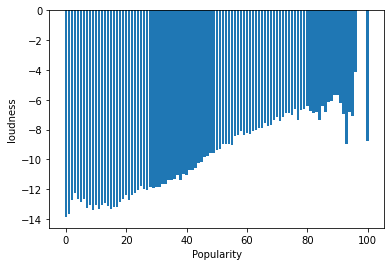

In [64]:
plt.bar(by_rating.index, by_rating.values)
plt.xlabel("Popularity")
plt.ylabel("loudness")
plt.show()

Ну да. Люди не очень любят, когда им долбят по ушам.

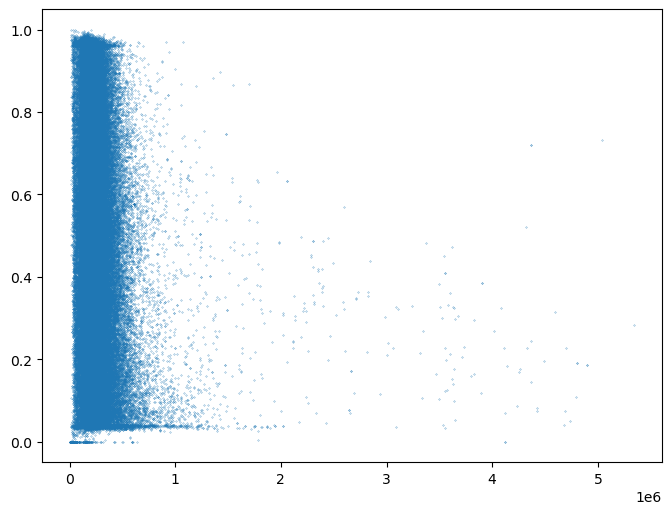

In [61]:
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(data.duration_ms, data.valence, s=0.05)
plt.show()

Опять же, очень логичный вывод. Мелодичные треки, у которых выше валентность, конечно, дольше, чем какой-нибудь поп или рэп.

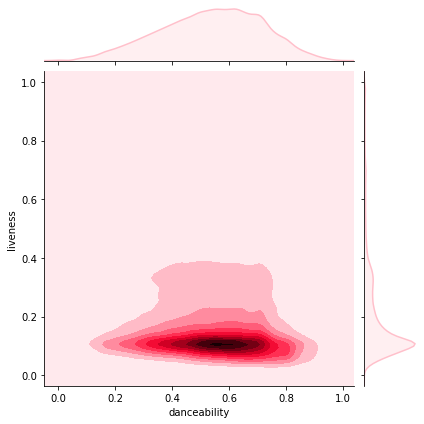

In [65]:
sns.jointplot("danceability", "liveness", data=data, kind="kde", color="pink");

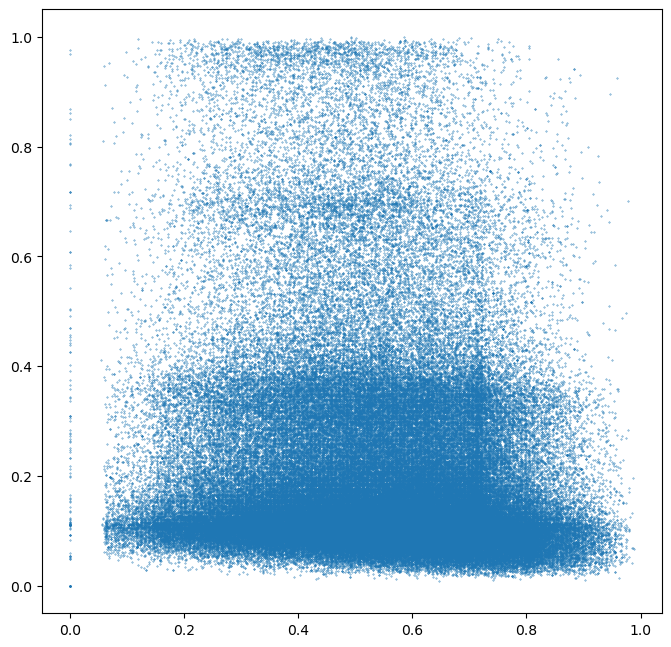

In [66]:
plt.figure(figsize=(8, 8), dpi=100)
plt.scatter(data.danceability, data.liveness, s=0.1)
plt.show()

А вот это очень интересный вывод. Люди, если верить модели, которая это посчитала, предпочитают танцевать под музыку, которая не live. Наверное, здесь под liveness имеется в виду что-то вроде качества записи, где liveness=1 - просто видео, записанное на концерте в не самом лучшем качестве. То есть, чем лучше качество записи, чем меньше она похожа на чистый live, тем скорее кто-то пустится под неё в пляс. В это уже поверить можно.